/Users/mryodo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:61: RuntimeWarning: invalid value encountered in arcsin


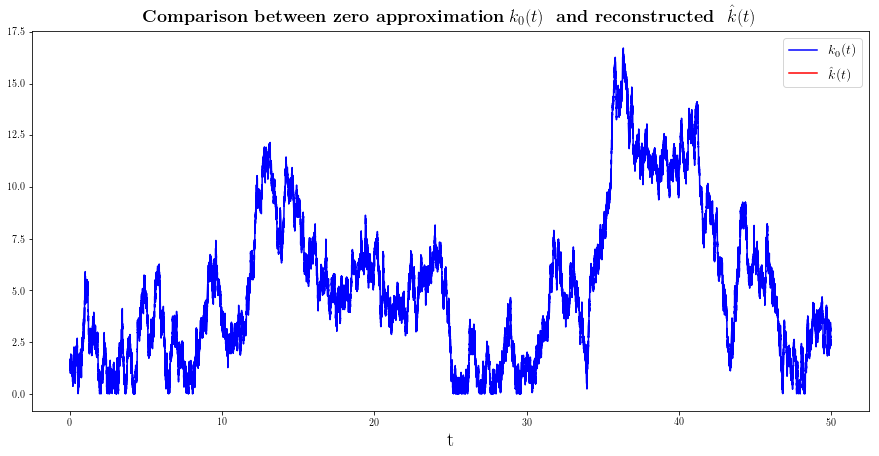

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import interpolate

import time

from math import *

weight=10

W=2*np.pi
dw=0.1*weight
T=(2*np.pi)/W
n=50
L=n*T

N_grid=20000
st=200
fn=19799

M=2*dw

move=20

alpha=0.99995
N_grid=int(1/(1-alpha))*10
t_t=np.linspace(0,L+2.5*T,N_grid+int(1/(1-alpha)))
t=np.linspace(0,L,N_grid)
k0_t=np.zeros(N_grid+int(1/(1-alpha)), np.dtype(float))
h=t[1]-t[0]

p=int(round(T/h))

# здесь можно подумать над тем, как мы его инициализируем

#alpha=1
sigma=.05
mu=(2*dw+sigma*move)*(1-alpha)
xi=sigma*np.random.randn(N_grid)+mu


for i in range(N_grid+int(1/(1-alpha))):
    if i==0:
        k0_t[i]=2*dw
    else:
        #k0[i]=alpha*k0[i-1]+np.sqrt(h)*xi[i-1]
        dif=np.random.normal(mu, sigma)
        #print(dif)
        k0_t[i]=alpha*k0_t[i-1]+dif
        if k0_t[i]<0:
            k0_t[i]=2*k0_t[i-1]-k0_t[i]
        #print(k0[i], dif)

k0=np.zeros(N_grid, np.dtype(float))
k0=k0_t[int(1/(1-alpha)):]

k0_f=interpolate.interp1d(t, k0, bounds_error=False, fill_value="extrapolate")


f=lambda t, x: 2*dw-k0_f(t)*sin(x)
init=np.arcsin(2*dw/k0[0])

theta=[0]*N_grid
for i in range(N_grid):
    if i==0:
        theta[i]=init
    else:
        k1=f(t[i-1], theta[i-1])*h
        k2=f(t[i-1]+h/2, theta[i-1]+k1/2)*h
        k3=f(t[i-1]+h/2, theta[i-1]+k2/2)*h
        k4=f(t[i-1]+h, theta[i-1]+k3)*h
        
        theta[i]=theta[i-1]+(k1+2*k2+2*k3+k4)/6
        

theta=np.array(theta)

x0=np.sin(W*t)
y0=np.sin(W*t+theta)

C_0=[0]*N_grid

for i in range(N_grid):
    if (t[i]-T/2>=0) and (t[i]+T/2<=L):
        C_0[i]=np.corrcoef(x0[i-int(p/2):i+int(p/2)], y0[i-int(p/2):i+int(p/2)])[0][1]
    else:
        C_0[i]=nan
        
phi0=np.arccos(C_0)

k_hat=np.divide(np.array([2*dw]*N_grid), np.sin(phi0))

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.figure(figsize=(15, 7))
plt.plot(t, k0, 'b')
plt.plot(t, k_hat, 'r')
plt.legend([r'$k_0(t)$', r'$\hat{k}(t)$'], fontsize=14)
plt.xlabel(r't', fontsize=20)
plt.title(r'\textbf{Comparison between zero approximation} $k_0(t)$ \textbf{ and reconstructed } $\hat{k}(t)$', fontsize=18)
plt.show()

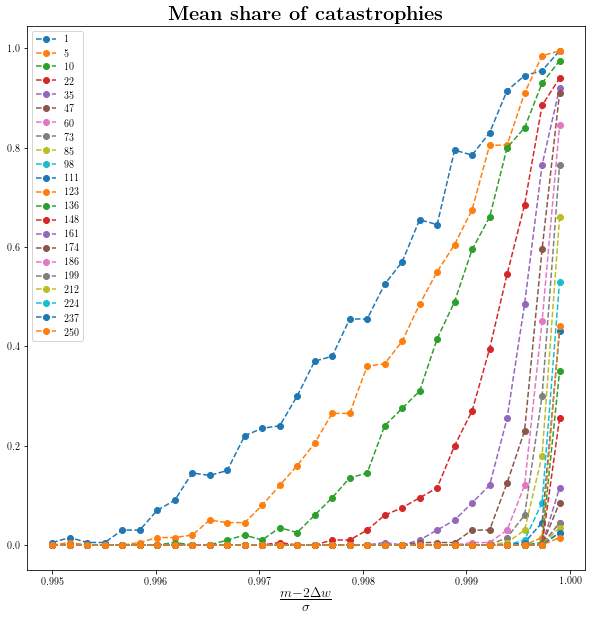

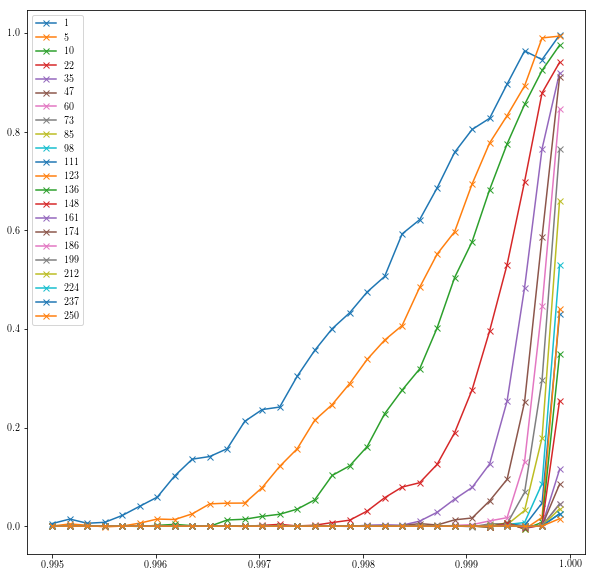

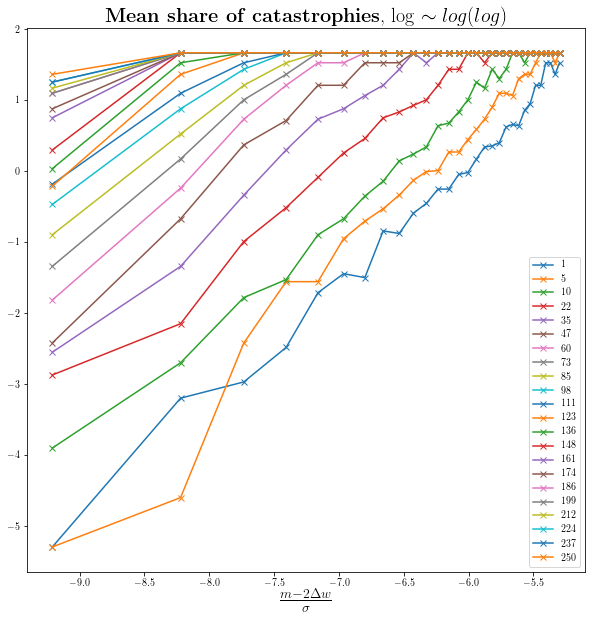

In [48]:
weight=10

W=2*np.pi
dw=0.1*weight
T=(2*np.pi)/W

p=200
n_wait=5

sample=200
A_cuts=30
move_cuts=20

alpha_s=np.linspace(0.995, 0.9999, A_cuts)
move_s=np.linspace(10, 250, move_cuts)
move_s=np.insert(move_s, axis=0, obj=0, values=5)
move_s=np.insert(move_s, axis=0, obj=0, values=1)

from scipy.signal import savgol_filter

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
res_all=np.zeros((A_cuts, move_cuts+2))
plt.figure(figsize=(10,10))
for i in range(move_cuts+2):
    res3=np.loadtxt('/Users/mryodo/Documents/num_res/3010/PT30('+str(int(move_s[i]))+')10_20_8000_q3_A_cor.out', delimiter=',')
    plt.plot(alpha_s, np.mean(res3, axis=1), 'o--', label=str(int(move_s[i])))
    res_all[:, i]=np.mean(res3, axis=1)
    #plt.plot(np.log(1-alpha_s), np.log(-np.log(savgol_filter(np.mean(res3, axis=1), 9, 6))), label=str(int(move_s[i])))
    #plt.plot(alpha_s, savgol_filter(np.mean(res3, axis=1), 9, 6), label=str(int(move_s[i])))
    plt.legend()

plt.title(r'\textbf{Mean share of catastrophies}', fontsize=20)
plt.xlabel(r'$\frac{m-2\Delta w}{\sigma}$', fontsize=20)
#res3=np.loadtxt('PT03(5)11_20_8000_q3_A_cor.out', delimiter=',')
#plt.plot(alpha_s, np.mean(res3, axis=1), 'o--')
plt.show()

from scipy.signal import savgol_filter

res_all=np.zeros((A_cuts, move_cuts+2))
plt.figure(figsize=(10,10))
for i in range(move_cuts+2):
    res3=np.loadtxt('/Users/mryodo/Documents/sun.activity/num_res/3010/PT30('+str(int(move_s[i]))+')10_20_8000_q3_A_cor.out', delimiter=',')
    #plt.plot(alpha_s, np.mean(res3, axis=1), 'o--')
    res_all[:, i]=np.mean(res3, axis=1)
    #plt.plot(np.log(1-alpha_s), np.log(-np.log(savgol_filter(np.mean(res3, axis=1), 9, 6))), label=str(int(move_s[i])))
    plt.plot(alpha_s, savgol_filter(np.mean(res3, axis=1), 9, 6), 'x-', label=str(int(move_s[i])))
    plt.legend()
plt.show()

from scipy.signal import savgol_filter

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
res_all=np.zeros((A_cuts, move_cuts+2))
plt.figure(figsize=(10,10))
for i in range(move_cuts+2):
    res3=np.loadtxt('/Users/mryodo/Documents/sun.activity/num_res/3010/PT30('+str(int(move_s[i]))+')10_20_8000_q3_A_cor.out', delimiter=',')
    #plt.plot(alpha_s, np.mean(res3, axis=1), 'o--')
    res_all[:, i]=np.mean(res3, axis=1)
    res_all[res_all[:,i]>198/200, i]=198/200
    #plt.plot(np.log(1-alpha_s), savgol_filter(np.log(-np.log(res_all[:, i]+1/200)), 9, 6), 'x-', label=str(int(move_s[i])))
    plt.plot(np.log(1-alpha_s), np.log(-np.log(res_all[:, i]+1/200)), 'x-', label=str(int(move_s[i])))
    #plt.plot(alpha_s, savgol_filter(np.mean(res3, axis=1), 9, 6), label=str(int(move_s[i])))
    plt.legend()
plt.title(r'\textbf{Mean share of catastrophies}, log \sim log(log)', fontsize=20)
plt.xlabel(r'$\frac{m-2\Delta w}{\sigma}$', fontsize=20)
plt.show()

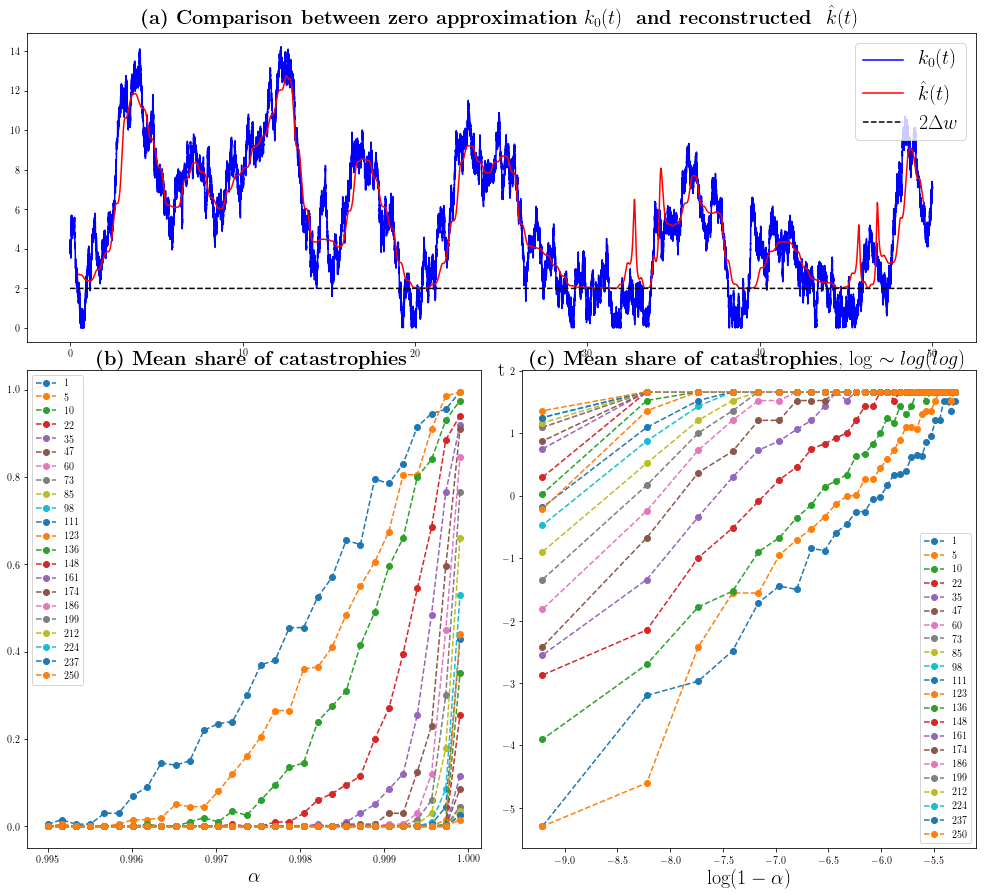

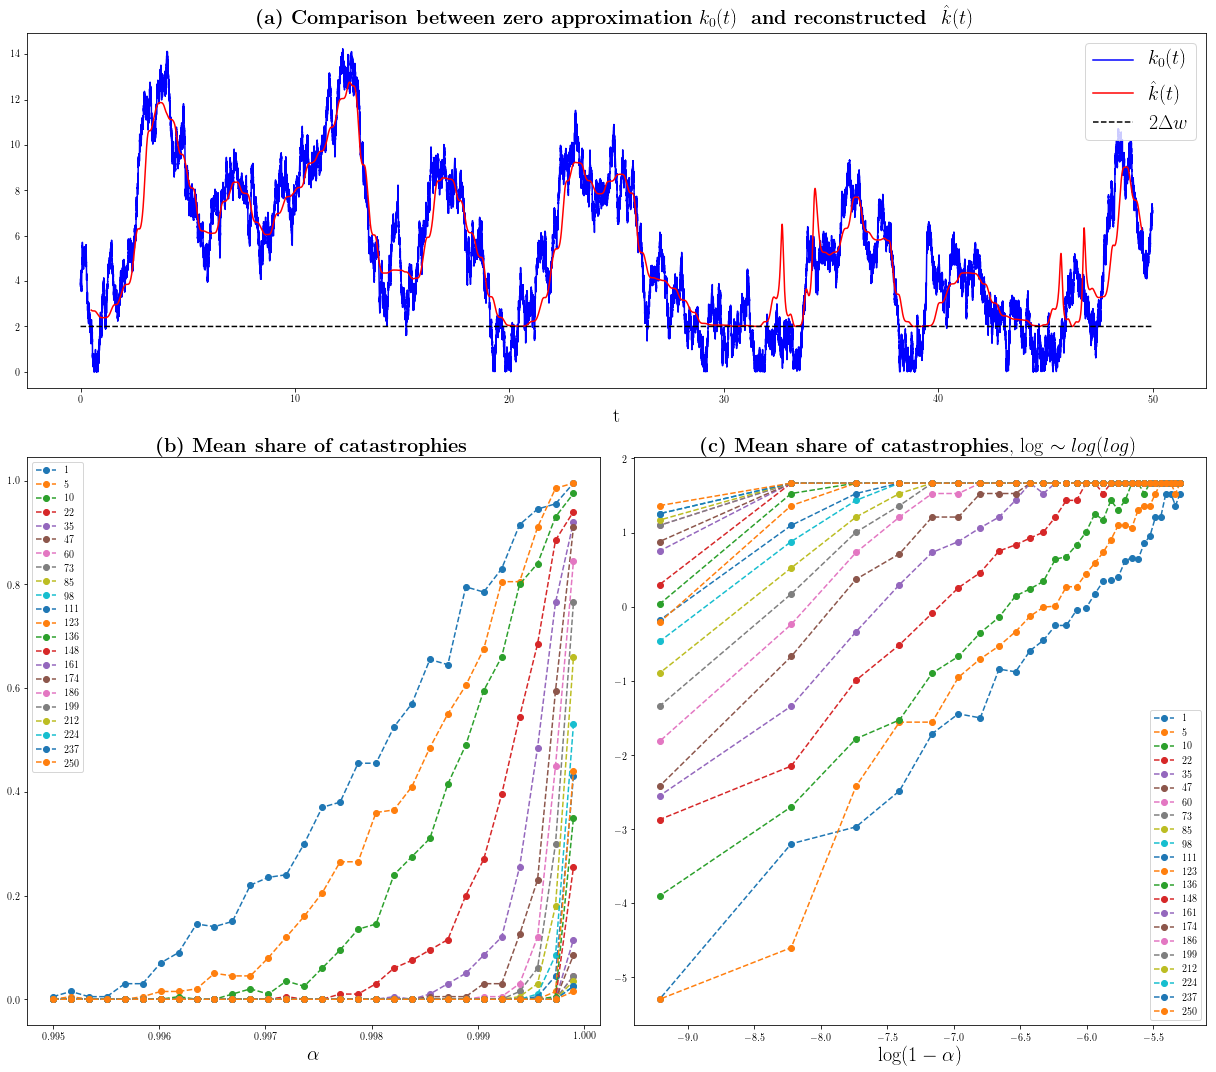

In [63]:
plt.figure(figsize=(17,15))

ax1 = plt.subplot2grid((5, 4), (0, 0), colspan=4, rowspan=2)
ax2 = plt.subplot2grid((5, 4), (2, 0), colspan=2, rowspan=3)
ax3 = plt.subplot2grid((5, 4), (2, 2), colspan=2, rowspan=3)


ax1.plot(t, k0, 'b')
ax1.plot(t, k_hat, 'r')
ax1.plot(t, [2*dw]*(N_grid), 'k--')
ax1.legend([r'$k_0(t)$', r'$\hat{k}(t)$', r'$2\Delta w$'], fontsize=20)
ax1.set_xlabel(r't', fontsize=20)
ax1.set_title(r'\textbf{(a) Comparison between zero approximation} $k_0(t)$ \textbf{ and reconstructed } $\hat{k}(t)$', fontsize=20)
#ax1.grid()

res_all=np.zeros((A_cuts, move_cuts+2))
for i in range(move_cuts+2):
    res3=np.loadtxt('/Users/mryodo/Documents/sun.activity/num_res/3010/PT30('+str(int(move_s[i]))+')10_20_8000_q3_A_cor.out', delimiter=',')
    ax2.plot(alpha_s, np.mean(res3, axis=1), 'o--', label=str(int(move_s[i])))
    res_all[:, i]=np.mean(res3, axis=1)
    ax2.legend()
ax2.set_title(r'\textbf{(b) Mean share of catastrophies}', fontsize=20)
ax2.set_xlabel(r'$\alpha$', fontsize=20)

for i in range(move_cuts+2):
    res3=np.loadtxt('/Users/mryodo/Documents/sun.activity/num_res/3010/PT30('+str(int(move_s[i]))+')10_20_8000_q3_A_cor.out', delimiter=',')
    res_all[:, i]=np.mean(res3, axis=1)
    res_all[res_all[:,i]>198/200, i]=198/200
    ax3.plot(np.log(1-alpha_s), np.log(-np.log(res_all[:, i]+1/200)), 'o--', label=str(int(move_s[i])))
    ax3.legend()
ax3.set_title(r'\textbf{(c) Mean share of catastrophies}, log \sim log(log)', fontsize=20)
ax3.set_xlabel(r'$\log (1-\alpha) $', fontsize=20)

plt.tight_layout()
#plt.savefig('ar1v1.eps', format='eps', dpi=1000)
plt.show()